In [25]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./final_data/final_data.csv')

In [11]:
data.index = pd.to_datetime(data['datetime'])

In [16]:
data = data[data.columns[2:]]

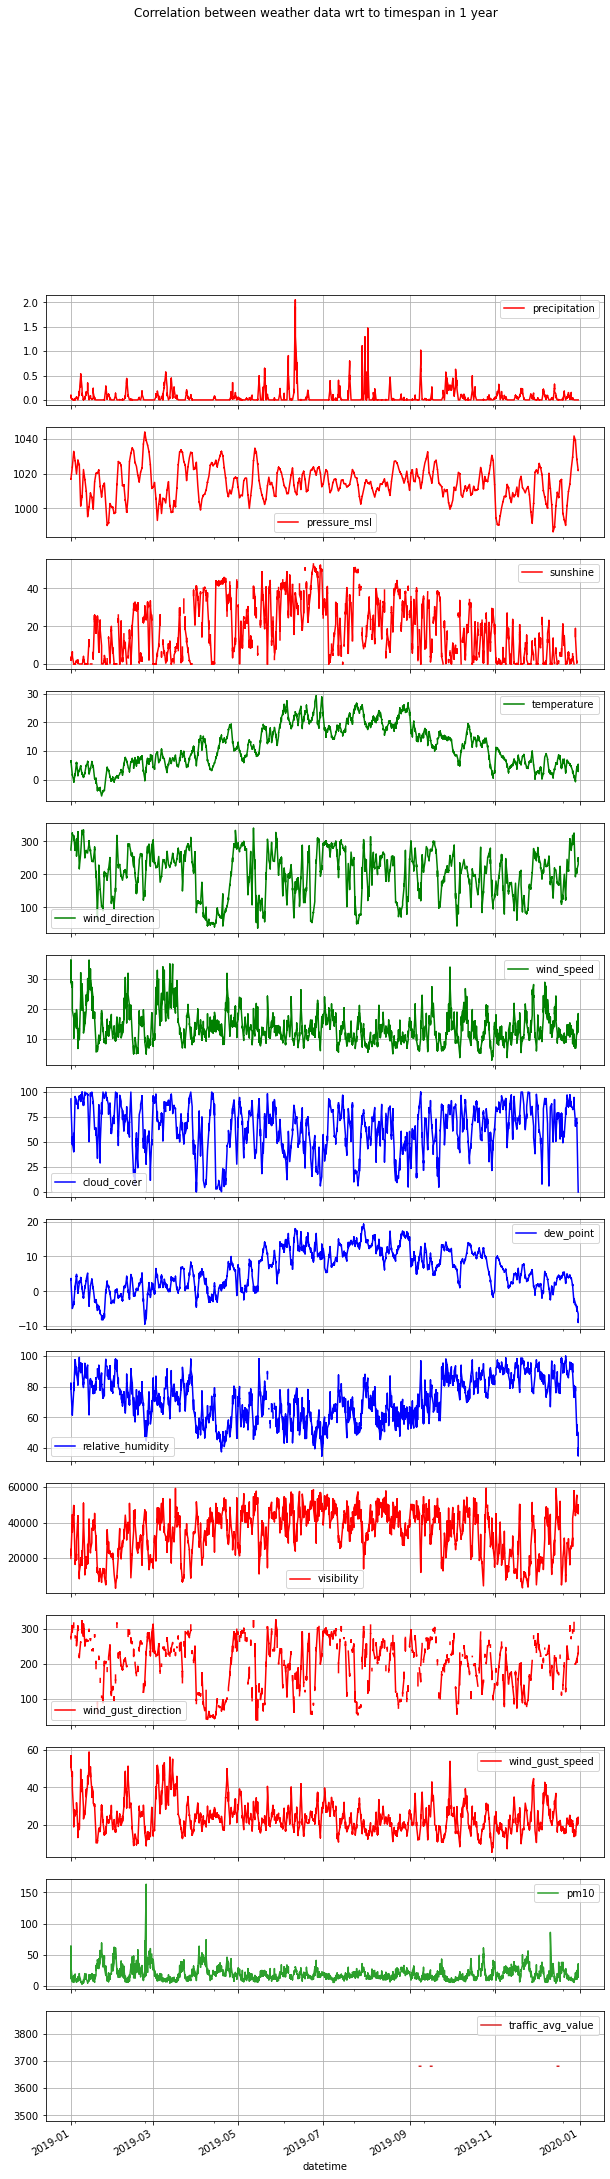

In [49]:
fig = data.plot(subplots = True, 
         grid=True, title="Correlation between weather data wrt to timespan in 1 year",
         layout=(15, 1), sharex=True, sharey=False, legend=True, 
         style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
         figsize=(10, 40))

## On the above images we can see that there is the relation between temperature and time of the months like in January the temperature is lower in compare to months like june/july as it was summer around that time.

In [22]:
data.describe()

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,pm10,traffic_avg_value
count,3650.000000,3650.000000,3271.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3610.000000,3650.000000,2550.000000,3650.000000,3632.000000,3.650000e+02
mean,0.058403,1014.547209,17.581038,11.591451,202.430162,13.444138,63.750263,5.952990,71.812596,34301.581224,202.700053,23.837416,19.359306,3.680240e+03
std,0.156152,9.840322,15.301631,7.388746,72.383417,5.369125,25.071007,5.810760,14.583557,12919.690269,71.795901,8.665509,10.139757,9.107432e-13
min,0.000000,986.362500,0.000000,-5.604167,37.083333,2.820833,0.000000,-9.470833,34.791667,3004.166667,38.750000,5.291667,3.000000,3.680240e+03
25%,0.000000,1008.183333,2.277778,5.720833,147.916667,9.741667,48.708333,1.308333,60.166667,25083.333333,145.000000,17.662500,12.000000,3.680240e+03
50%,0.000000,1014.125000,14.777778,10.641667,217.083333,12.454167,68.020833,5.935417,72.625000,36989.583333,217.871377,22.483333,17.000000,3.680240e+03
75%,0.045833,1021.225000,30.277778,17.650000,260.000000,16.170833,84.166667,10.751042,84.163043,44166.666667,260.833333,28.062500,24.000000,3.680240e+03
max,2.050000,1044.069583,53.000000,29.187500,340.000000,36.325000,100.000000,19.329167,100.000000,59375.000000,325.000000,58.908333,163.000000,3.680240e+03


In [28]:
mask = np.random.rand(len(data)) < 0.745
train_data = data[mask]
test_data = data[~mask]

In [32]:
data.shape, train_data.shape, test_data.shape

((3650, 19), (2765, 19), (885, 19))

In [35]:
train_data.shape

(2765, 19)

In [36]:
test_data.shape

(885, 19)

In [39]:
from sklearn import linear_model

In [40]:
lin_mod=linear_model.LinearRegression()

#use of np.asanyarray() to make the input data frame column to output as a numpy array


In [41]:
train_data.columns

Index(['precipitation', 'pressure_msl', 'sunshine', 'temperature',
       'wind_direction', 'wind_speed', 'cloud_cover', 'dew_point',
       'relative_humidity', 'visibility', 'wind_gust_direction',
       'wind_gust_speed', 'sensor_station', 'station', 'core', 'component',
       'period', 'pm10', 'traffic_avg_value'],
      dtype='object')

In [42]:
train_x = np.asanyarray(train_data)
train_y = np.asanyarray(train_data[['pm10']])

In [43]:
#.fit() function trains our model on the training data

lin_mod.fit (train_x, train_y)

ValueError: could not convert string to float: '010 Wedding'

In [ ]:


#.coef_ is the attribute, which contains the value of Theta_1 or the slope of the best fit line
#.intercept_ is the another attribute, containing the value of Theta_0 or intercept of the line

print ('Value of gradient/slope is ', lin_mod.coef_)
print ('Value of intercept is ',lin_mod.intercept_)


In [52]:
from folium.plugins import HeatMapWithTime

In [53]:

fig7=Figure(width=850,height=550)
m7=folium.Map(location=[40.712776, -74.005974],zoom_start=10)
fig7.add_child(m7)

NameError: name 'Figure' is not defined